In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import ta

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
metals = pd.read_csv("silver_spot_london.csv",parse_dates= True, index_col = 'Date')
metals['Gold Spot'] = pd.to_numeric(metals['Gold Spot'], errors='coerce')
metals['Silver Spot'] = pd.to_numeric(metals['Silver Spot'], errors='coerce')
silver = metals['Silver Spot'].dropna().to_frame()
silver = silver['Silver Spot'].replace({0:np.nan})
gold = metals['Gold Spot'].dropna()
gold_monthly = gold['1719':].resample('M').mean()
silver_monthly = silver['1719':].resample('M').mean()
quad_au = gold_monthly.interpolate(method = 'quadratic')
quad_ag = silver_monthly.interpolate(method = 'quadratic')

In [7]:
dja = pd.read_csv("DJA.csv", parse_dates = True, index_col = 'Date')

,DJIA
Date,
1885-02-16,30.9226
1885-02-17,31.3365
1885-02-18,31.4744
1885-02-19,31.6765
1885-02-20,31.4252


In [13]:
dja.tail()

,DJIA
Date,
2018-08-27,26049.64
2018-08-28,26064.02
2018-08-29,26124.57
2018-08-30,25986.92
2018-08-31,25964.82


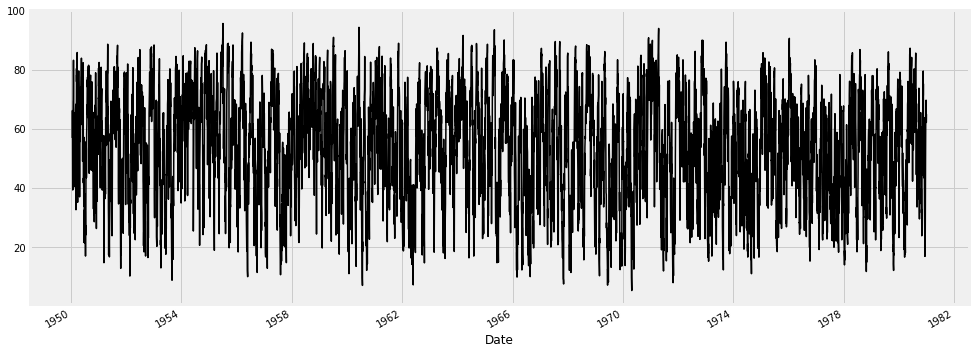

In [25]:
ta.rsi(dja['DJIA']['1950':'1980'], n = 14).plot(figsize = [15,6], linewidth = 1.5, color = 'black')

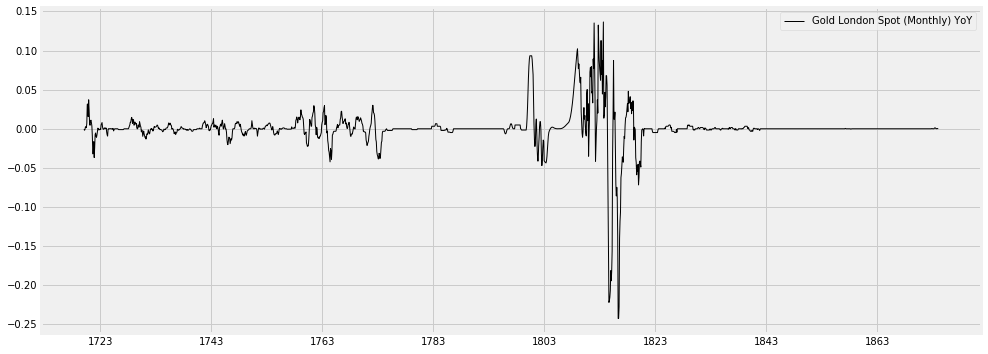

In [3]:
plt.figure(figsize = [15,6])
plt.plot(quad_au.pct_change(12), color = 'black', label = 'Gold London Spot (Monthly) YoY',linewidth = 1)
plt.legend()

In [162]:
box_au = quad_au.pct_change()['1790':'1820'].to_frame()
box_au['Year'] = box_au.index.year

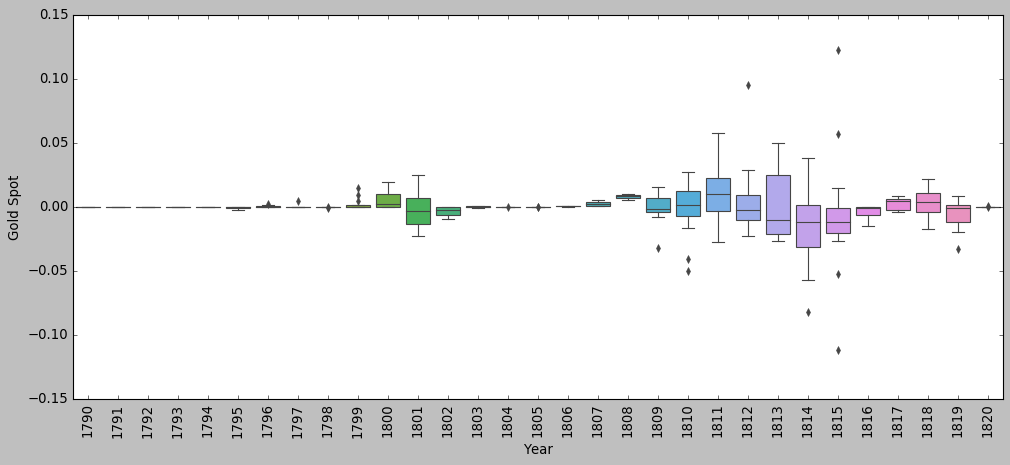

In [163]:
fig, ax = plt.subplots(figsize = [15,6])
ax = sns.boxplot(data = box_au, x='Year',y='Gold Spot')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [7]:
london_stocks_raw = pd.read_csv("london_stocks.txt", sep = ',')
london_stocks_raw = london_stocks_raw.rename(columns = {'MNTH':'MONTH'})
london_stocks_index = pd.to_datetime(london_stocks_raw[['YEAR','MONTH','DAY']])
london_stocks = pd.DataFrame(london_stocks_raw[['SSC','BOE','EIC','3PCNTCONS']].values, index = london_stocks_index)
london_stocks.columns = ['SSC','BOE','EIC','3PCT CONS']
cols = london_stocks.columns
london_stocks = london_stocks[cols].replace({0:np.nan})

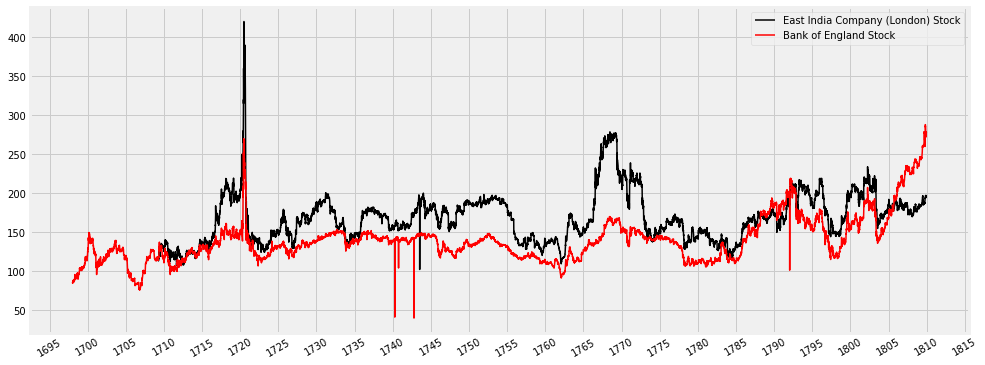

In [8]:
fig, ax = plt.subplots(figsize = [15,6])
ax.plot(london_stocks['EIC'].dropna(), color = 'black', linewidth = 1.5, label = 'East India Company (London) Stock')
ax.plot(london_stocks['BOE'].dropna(), color = 'red', linewidth = 1.5, label = 'Bank of England Stock')
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator(5))
#ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth = [3,6,9,12]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
for item in ax.get_xticklabels():
    item.set_rotation(30)

In [9]:
fig.savefig("london stocks.png",format = 'png')

In [10]:
eic_monthly = london_stocks['EIC'].dropna().resample('M').mean()
boe_monthly = london_stocks['BOE'].dropna().resample('M').mean()

In [14]:
eic_rol_sd = eic_monthly.pct_change().rolling(window = 60).std().to_frame()
eic_rol_sd['Sample Std Dev'] = eic_monthly.pct_change().std()
boe_rol_sd = boe_monthly.pct_change().rolling(window = 60).std().to_frame()
boe_rol_sd['Sample Std Dev'] = boe_monthly.pct_change().std()
eic_rol_mean = eic_monthly.pct_change().rolling(window = 60).mean().to_frame()
eic_rol_mean['Sample Mean'] = eic_monthly.pct_change().mean()
boe_rol_mean = boe_monthly.pct_change().rolling(window = 60).mean().to_frame()
boe_rol_mean['Sample Mean'] = boe_monthly.pct_change().mean()
au_rol_std = quad_au.pct_change().rolling(window = 60).std().to_frame()
au_rol_std['Sample Std Dev'] = quad_au.pct_change().std()

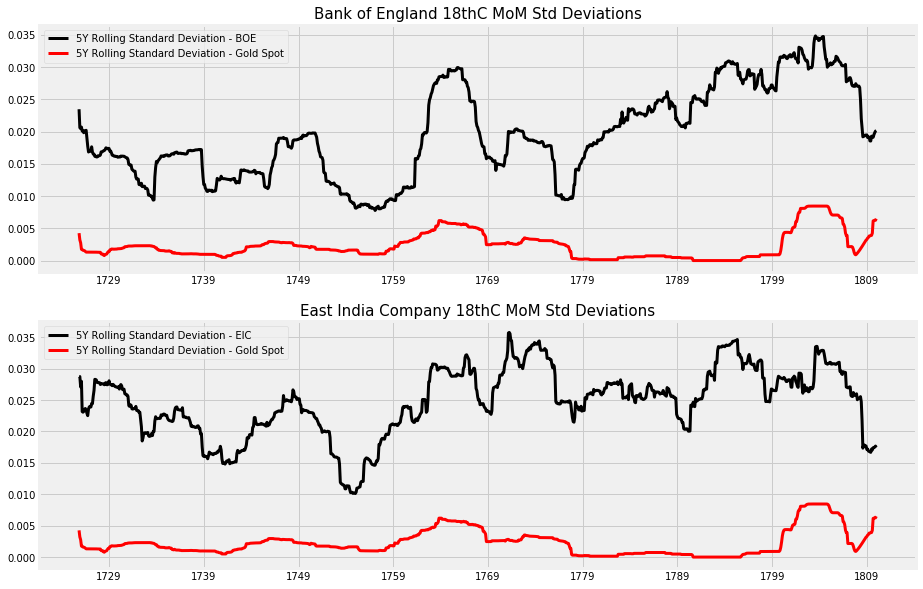

In [15]:
plt.figure(figsize = [14,10])

plt.subplot(211)
plt.title('Bank of England 18thC MoM Std Deviations', fontsize = 15)
plt.plot(boe_rol_sd['1725-10':]['BOE'], label = '5Y Rolling Standard Deviation - BOE', color = 'black', linewidth = 3)
#plt.plot(boe_rol_sd['1725-10':]['Sample Std Dev'], label = 'Sample Standard Deviation - BOE', color = 'red', linewidth = 3)
plt.plot(au_rol_std['1725-10':'1809']['Gold Spot'], label = '5Y Rolling Standard Deviation - Gold Spot', color = 'red', linewidth = 3)
plt.legend()

plt.subplot(212)
plt.title('East India Company 18thC MoM Std Deviations', fontsize = 15)
plt.plot(eic_rol_sd['1725-10':]['EIC'], label = '5Y Rolling Standard Deviation - EIC', color = 'black', linewidth = 3)
#plt.plot(eic_rol_sd['1725-10':]['Sample Std Dev'], label = 'Sample Standard Deviation - EIC', color = 'red', linewidth = 3)
plt.plot(au_rol_std['1725-10':'1809']['Gold Spot'], label = '5Y Rolling Standard Deviation - Gold Spot', color = 'red', linewidth = 3)
plt.legend()

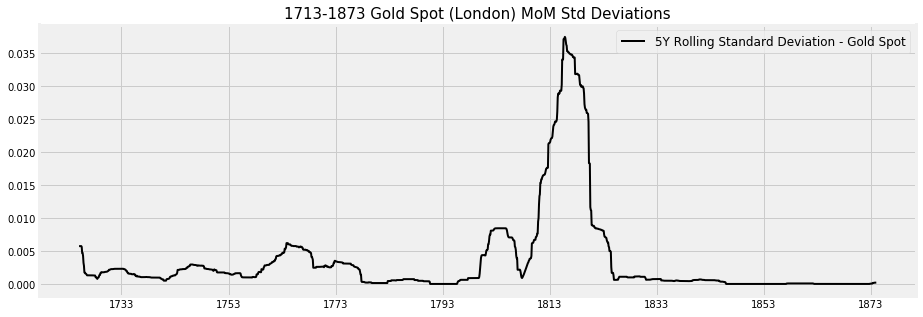

In [16]:
plt.figure(figsize = [14,5])
plt.title('1713-1873 Gold Spot (London) MoM Std Deviations', fontsize = 15)
plt.plot(au_rol_std['1725':]['Gold Spot'], label = '5Y Rolling Standard Deviation - Gold Spot', color = 'black', linewidth = 2)
#plt.plot(au_rol_std['1725':]['Sample Std Dev'], label = 'Sample Standard Deviation - Gold Spot', color = 'red', linewidth = 3)
plt.legend(fontsize = 12)

In [17]:
ams_raw = pd.read_csv("amsterdam_stocks.txt", sep = ',')
ams_raw = ams_raw.rename(columns = {'MNTH':'MONTH'})
ams_idx = pd.to_datetime(ams_raw[['YEAR','MONTH','DAY']])
ams_stocks = pd.DataFrame(data = ams_raw[['AAR','ADWIC','ADEIC']].values, index = ams_idx)
ams_stocks.columns = ['AAR','ADWIC','ADEIC']

In [18]:
ams_eic_monthly = ams_stocks['ADEIC'].resample('M').mean()
ams_eic_monthly = ams_eic_monthly.interpolate(method = 'linear')

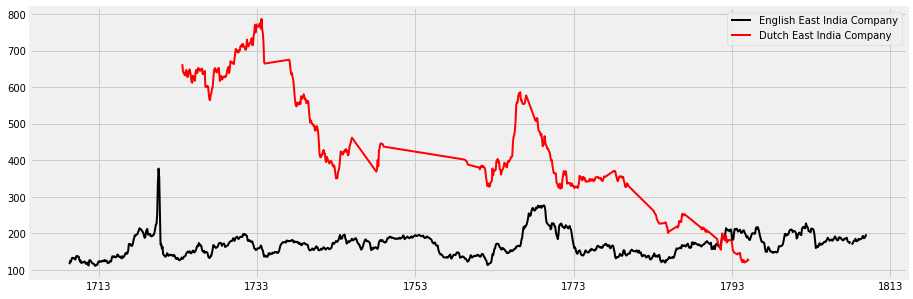

In [19]:
plt.figure(figsize=[14,5])
plt.plot(eic_monthly,color = 'black', linewidth = 2, label = 'English East India Company')
plt.plot(ams_eic_monthly, color = 'red', linewidth = 2, label = 'Dutch East India Company')
plt.legend()

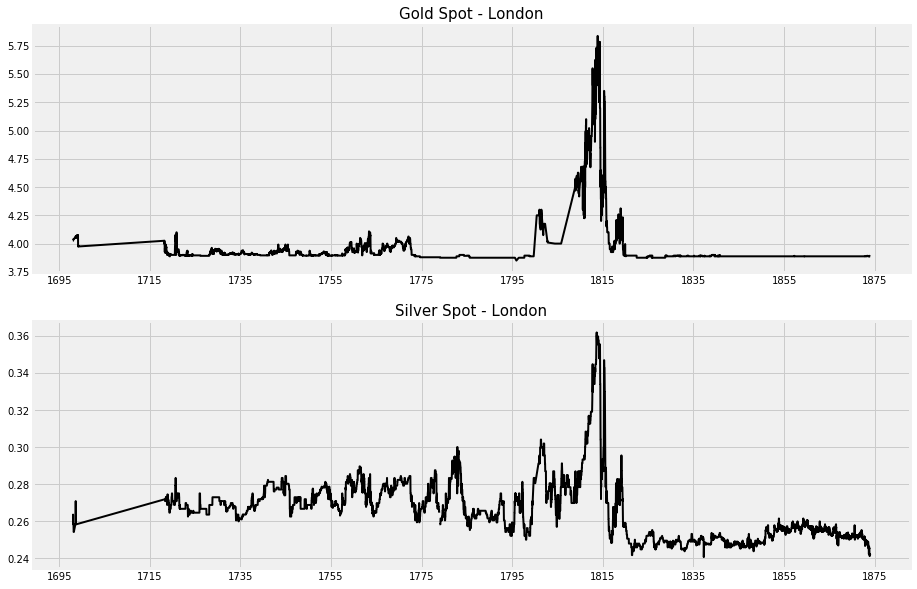

In [20]:
plt.figure(figsize = [14,10])

plt.subplot(211)
plt.title('Gold Spot - London', fontsize = 15)
plt.plot(gold, color = 'black', linewidth = 2)

plt.subplot(212)
plt.title('Silver Spot - London', fontsize = 15)
plt.plot(silver, color = 'black', linewidth = 2)

In [64]:
new_world = pd.ExcelFile("new_world_metals.xlsx")

potosi = new_world.parse(0)
zacatecas = new_world.parse(1)
nuevo_mundo = new_world.parse(2)

#potosi['Date'] = pd.period_range(start = '1550-01-01', end = '1735-01-01', freq = 'A')
#potosi.set_index('Date', inplace = True)

In [100]:
combined_gold_indinf = pd.merge(potosi, ind_inf, on = 'Year', how = 'outer')
combined_gold_indinf = combined_gold_indinf.rename(columns = {'Kilograms':'Potosi Kgs','Pesos':'Potosi Value'})

In [101]:
merged = pd.merge(combined_gold_indinf, zacatecas, on = 'Year', how = 'outer')
merged = merged.rename(columns = {'Kilograms':'Zacatecas Kgs','Daily Average':'Zac Daily Avg','Estimated Annual Output':'Zac Est Output'})

In [150]:
plt.style.use("classic")

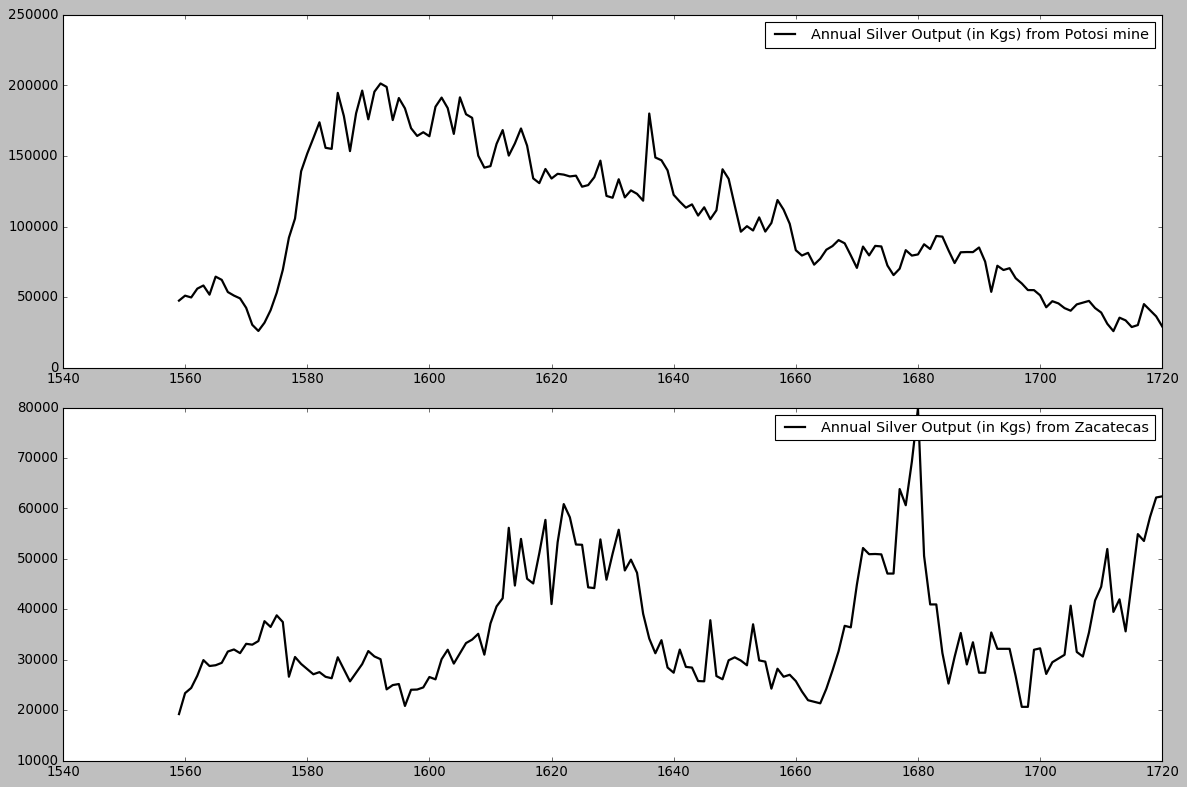

In [151]:
plt.figure(figsize = [15,10])

plt.subplot(211)
plt.plot(merged['Year'][9:171], merged['Potosi Kgs'][9:171], linewidth = 2, color = 'black', label = 'Annual Silver Output (in Kgs) from Potosi mine')
plt.legend(fontsize = 13)

plt.subplot(212)
plt.plot(merged['Year'][9:171], merged['Zac Est Output'][9:171], linewidth = 2, color = 'black', label = 'Annual Silver Output (in Kgs) from Zacatecas')
plt.legend(fontsize = 13)

plt.tight_layout()

In [129]:
ind_inf['Year'][325]

1920

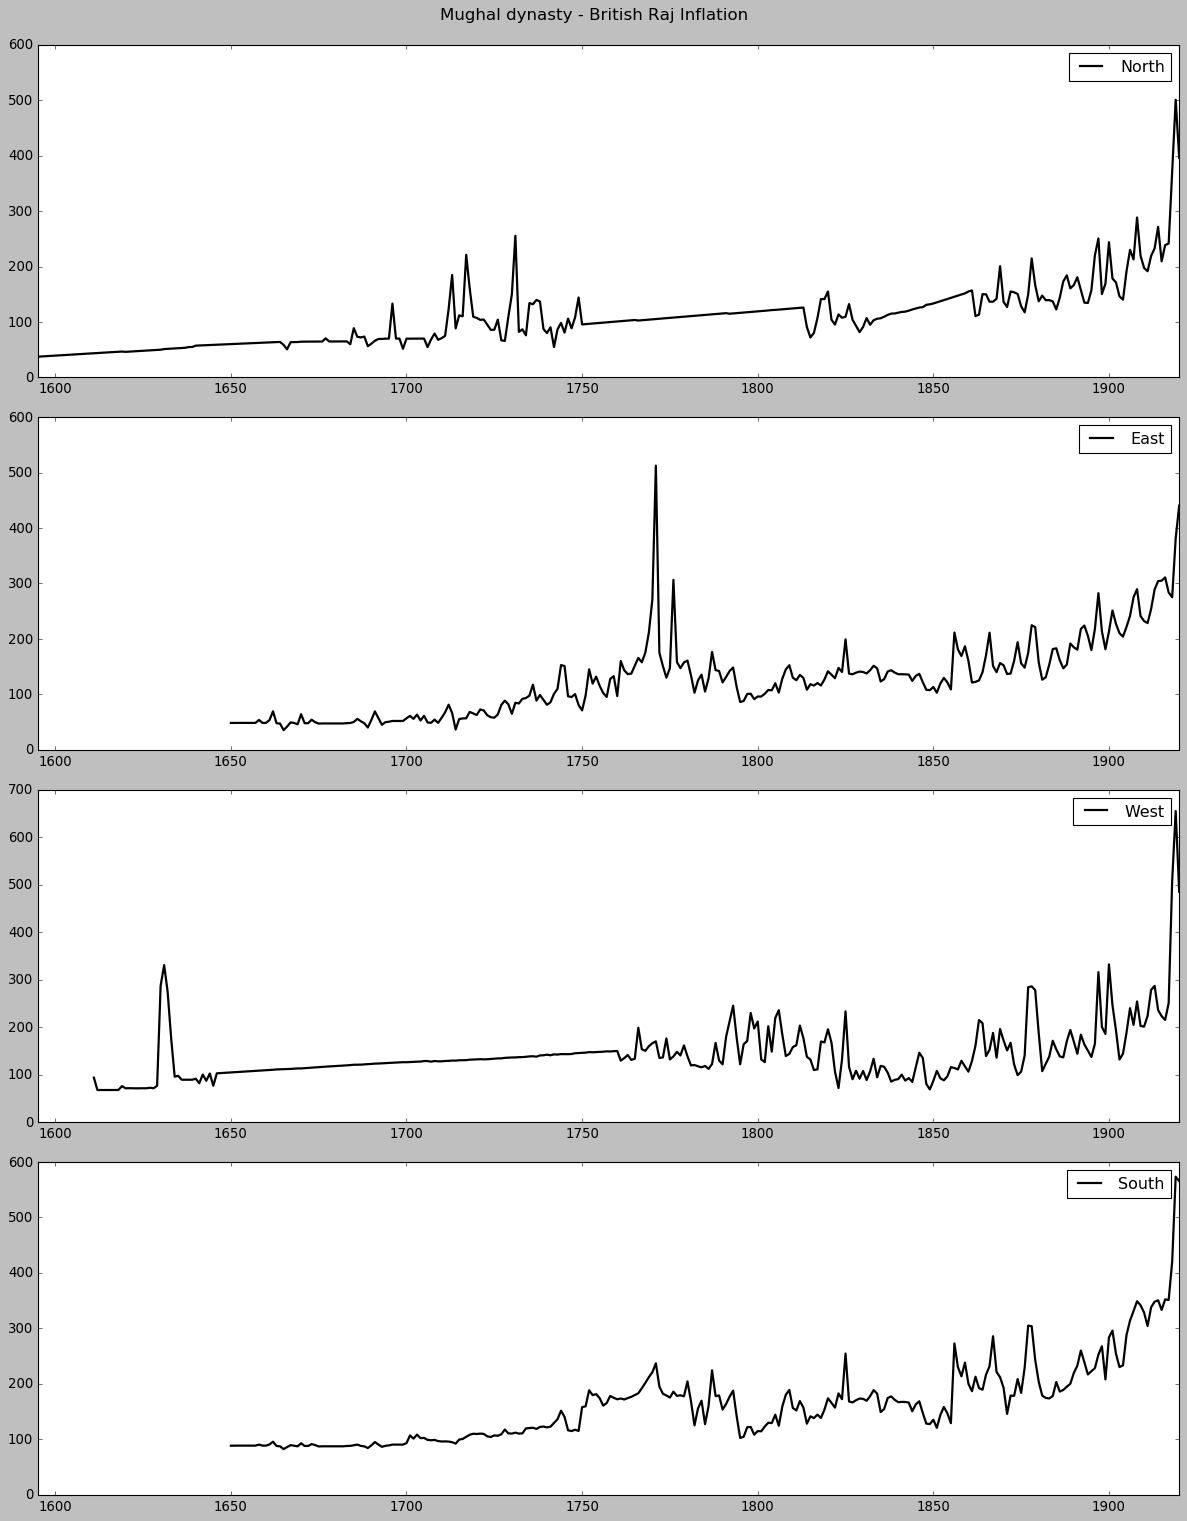

In [154]:
plt.figure(figsize = [15,20])
plt.suptitle('Mughal dynasty - British Raj Inflation', fontsize = 15)

plt.subplot(411)
plt.plot(ind_inf['Year'], ind_inf['North'], linewidth= 2,color = 'black', label = 'North')
plt.xlim(ind_inf['Year'][0], ind_inf['Year'][325])
plt.legend()

plt.subplot(412)
plt.plot(ind_inf['Year'], ind_inf['East'], linewidth= 2,color = 'black', label = 'East')
plt.xlim(ind_inf['Year'][0], ind_inf['Year'][325])
plt.legend()

plt.subplot(413)
plt.plot(ind_inf['Year'], ind_inf['West'], linewidth= 2,color = 'black', label = 'West')
plt.xlim(ind_inf['Year'][0], ind_inf['Year'][325])
plt.legend()

plt.subplot(414)
plt.plot(ind_inf['Year'], ind_inf['South'], linewidth= 2,color = 'black', label = 'South')
plt.xlim(ind_inf['Year'][0], ind_inf['Year'][325])
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])

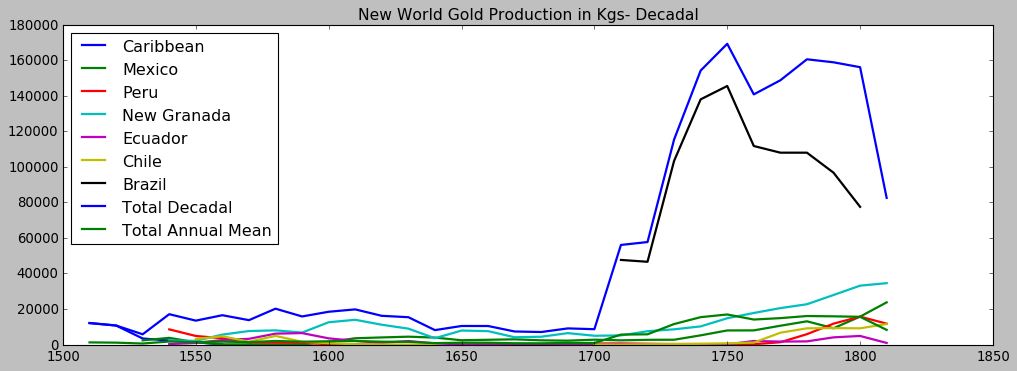

In [156]:
plt.figure(figsize = [15,5])
plt.title('New World Gold Production in Kgs- Decadal', fontsize = 14)
plt.plot(nuevo_mundo['Decade'], nuevo_mundo[nuevo_mundo.columns[1:]], linewidth = 2)
plt.legend(nuevo_mundo.columns[1:], loc = 2)

In [52]:
ind_inf = pd.read_csv("india_hist_inflation.csv")
#ind_inf['Year'] = pd.period_range(start = "1595-01-01", periods= 326, freq = "A")
#ind_inf.set_index('Year', inplace = True)

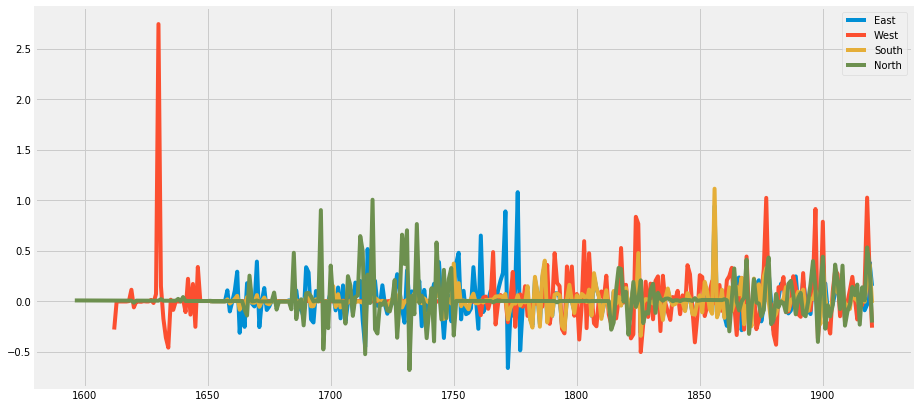

In [56]:
plt.figure(figsize = [14,7])
plt.plot(ind_inf['Year'], ind_inf[ind_inf.columns[1:]].pct_change())
plt.legend(ind_inf.columns[1:])

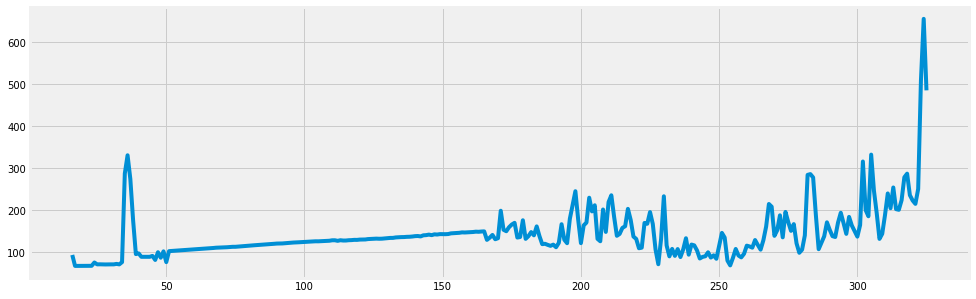

In [57]:
ind_inf['West'].plot(figsize = [15,5])